1. Loading dataset...
Dataset loaded. Shape: (45593, 21)
Time elapsed: 0.14 seconds

2. Cleaning Time_taken column...
Time elapsed: 0.17 seconds

3. Categorizing time of day...
Time elapsed: 0.46 seconds

4. Calculating delivery distances...
Time elapsed: 0.46 seconds

5. Creating dummy variables...
Time elapsed: 0.48 seconds

6. Converting Holiday to numeric...
Time elapsed: 0.48 seconds

7. Calculating correlations...
Time elapsed: 0.53 seconds

8. Creating visualization...
Time elapsed: 0.64 seconds

9. Displaying results...


/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


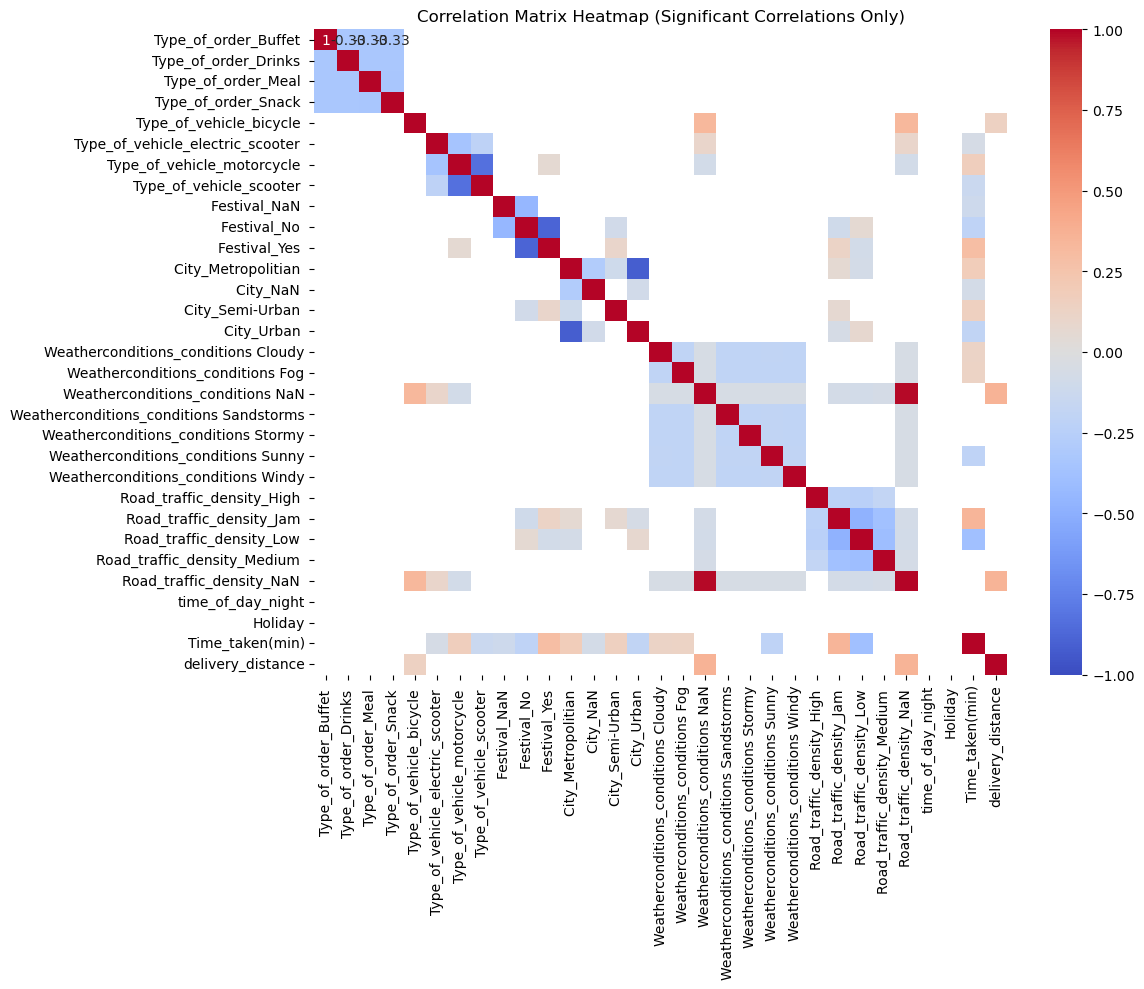


Correlation with Time_taken(min):
Time_taken(min)                            1.000000
Road_traffic_density_Jam                   0.348888
Festival_Yes                               0.290046
City_Metropolitian                         0.187272
Type_of_vehicle_motorcycle                 0.164121
City_Semi-Urban                            0.150067
Weatherconditions_conditions Fog           0.125481
Weatherconditions_conditions Cloudy        0.124375
Road_traffic_density_High                  0.033030
Road_traffic_density_Medium                0.024263
Type_of_order_Meal                         0.007697
Weatherconditions_conditions NaN           0.003128
Road_traffic_density_NaN                   0.003052
Type_of_vehicle_bicycle                    0.000543
Type_of_order_Snack                       -0.000515
Type_of_order_Buffet                      -0.000678
delivery_distance                         -0.002508
Type_of_order_Drinks                      -0.006533
Weatherconditions_conditions 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

# Start timing
start_time = time()

print("1. Loading dataset...")
file_path = '/Users/lanahuyen/UCB Bootcamp/food_delivery/data/train_dataset_with_holidays.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded. Shape: {df.shape}")
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("2. Cleaning Time_taken column...")
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'].str.extract(r'(\d+)')[0])
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("3. Categorizing time of day...")
def categorize_time_vectorized(series):
    hours = pd.to_numeric(series.str.split(':').str[0], errors='coerce')
    conditions = [
        (hours >= 5) & (hours < 12),
        (hours >= 12) & (hours < 17),
        (hours >= 17) & (hours < 22)
    ]
    choices = ['morning', 'afternoon', 'evening']
    return pd.Series(np.select(conditions, choices, default='night'))

df['time_of_day'] = categorize_time_vectorized(df['Time_Orderd'])
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("4. Calculating delivery distances...")
def haversine_distance_vectorized(df):
    R = 6371
    lat1 = np.radians(df['Restaurant_latitude'])
    lon1 = np.radians(df['Restaurant_longitude'])
    lat2 = np.radians(df['Delivery_location_latitude'])
    lon2 = np.radians(df['Delivery_location_longitude'])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df['delivery_distance'] = haversine_distance_vectorized(df)
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("5. Creating dummy variables...")
categorical_columns = [
    'Type_of_order',
    'Type_of_vehicle',
    'Festival',
    'City',
    'Weatherconditions',
    'Road_traffic_density',
    'time_of_day'
]

df_encoded = pd.get_dummies(df[categorical_columns])
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("6. Converting Holiday to numeric...")
df_encoded['Holiday'] = (df['Holiday'] == 'Yes').astype(int)
df_encoded['Time_taken(min)'] = df['Time_taken(min)']
df_encoded['delivery_distance'] = df['delivery_distance']
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("7. Calculating correlations...")
correlation_matrix = df_encoded.corr()
correlation_with_time = correlation_matrix['Time_taken(min)'].sort_values(ascending=False)
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("8. Creating visualization...")
threshold = 0.05
significant_corr = correlation_matrix[abs(correlation_matrix) > threshold]

plt.figure(figsize=(12, 10))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap (Significant Correlations Only)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
print(f"Time elapsed: {time() - start_time:.2f} seconds\n")

print("9. Displaying results...")
plt.show()

print("\nCorrelation with Time_taken(min):")
print(correlation_with_time)

print("\nUnique values in important columns:")
columns_to_check = ['Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 
                   'Festival', 'City', 'Weatherconditions', 'time_of_day', 'Holiday']

for col in columns_to_check:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print("-" * 50)

print(f"\nTotal execution time: {time() - start_time:.2f} seconds")

1. Preparing the data...
2. Training multiple models...

Training Linear Regression...

Training Ridge Regression...

Training Lasso Regression...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

3. Model Performance Comparison:
                       RMSE        R2  CV_R2_mean  CV_R2_std
Linear Regression  7.533208  0.352755    0.358097   0.007554
Ridge Regression   7.532228  0.352924    0.358258   0.007476
Lasso Regression   7.992522  0.271422    0.274339   0.004242
Random Forest      7.166099  0.414301    0.428596   0.010413
Gradient Boosting  6.485857  0.520219    0.523676   0.006916
XGBoost            6.414536  0.530712    0.531993   0.007144

4. Top 10 Most Important Features:
                                feature  importance
29                    delivery_distance    0.399375
24            Road_traffic_density_Low     0.154447
20   Weatherconditions_conditions Sunny    0.091024
16     Weatherconditions_conditions Fog    0.048176
15  Weathercondit

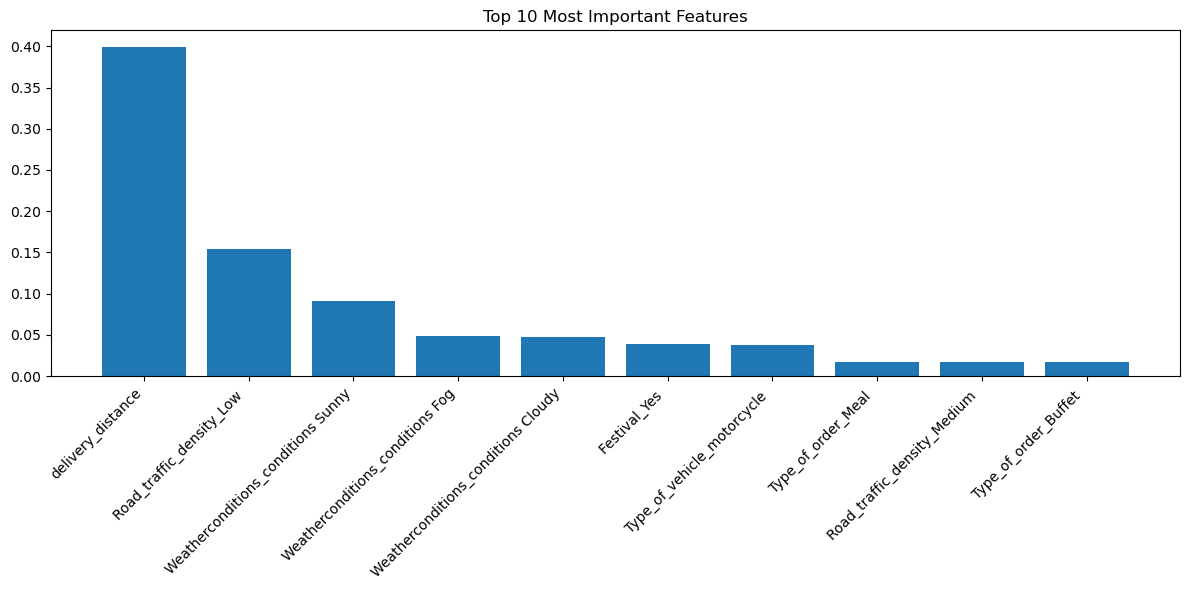


Total execution time: 42.50 seconds

5. Example Prediction:
Predicted delivery time: 43.46 minutes
Actual delivery time: 44.00 minutes


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from time import time

# Start timing
start_time = time()

print("1. Preparing the data...")
# Assuming df_encoded is your preprocessed dataframe from the previous analysis
X = df_encoded.drop('Time_taken(min)', axis=1)
y = df_encoded['Time_taken(min)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("2. Training multiple models...")
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std()
    }

print("\n3. Model Performance Comparison:")
results_df = pd.DataFrame(results).T
print(results_df)

# For the best performing model (assuming it's Random Forest or XGBoost)
best_model = models['Random Forest']  # or whichever performed best
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n4. Top 10 Most Important Features:")
print(feature_importance.head(10))

# Optional: Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

print(f"\nTotal execution time: {time() - start_time:.2f} seconds")

# Optional: Make predictions on new data
def predict_delivery_time(model, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    # Make prediction
    prediction = model.predict(new_data_scaled)
    return prediction

# Example of how to use the model for predictions
print("\n5. Example Prediction:")
sample_data = X_test_scaled[0].reshape(1, -1)  # Take first test sample
prediction = best_model.predict(sample_data)
print(f"Predicted delivery time: {prediction[0]:.2f} minutes")
print(f"Actual delivery time: {y_test.iloc[0]:.2f} minutes")

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from itertools import combinations
from time import time
from sklearn.metrics import r2_score

# Start timing
start_time = time()

print("1. Preparing the data...")
# Assuming df_encoded is your preprocessed dataframe
X = df_encoded.drop('Time_taken(min)', axis=1)
y = df_encoded['Time_taken(min)']

# Get list of all features
features = list(X.columns)

# Initialize best results
best_r2 = 0
best_features = None
best_model = None

# Try different feature combinations
print("\n2. Testing feature combinations...")
for n_features in range(2, len(features) + 1):
    print(f"\nTrying combinations of {n_features} features...")
    
    # Get all combinations of current size
    for feature_combo in combinations(features, n_features):
        X_subset = X[list(feature_combo)]
        
        # Split and scale the data
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Try both Random Forest and XGBoost
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'XGBoost': xgb.XGBRegressor(random_state=42)
        }
        
        for model_name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            r2 = r2_score(y_test, y_pred)
            
            if r2 > best_r2:
                best_r2 = r2
                best_features = feature_combo
                best_model = model
                print(f"\nNew best R² found: {best_r2:.4f}")
                print(f"Model: {model_name}")
                print("Features:", feature_combo)
                
            # Stop if we reach desired R²
            if r2 >= 0.80:
                print(f"\nReached target R² of 0.80!")
                break
                
        if best_r2 >= 0.80:
            break
            
    if best_r2 >= 0.80:
        break

print("\n3. Final Results:")
print(f"Best R² Score: {best_r2:.4f}")
print("Best Features:", best_features)

# Feature importance for best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': best_features,
        'importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    print("\n4. Feature Importance:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Feature Importance for Best Model')
    plt.tight_layout()
    plt.show()

# Create prediction function with best model
def predict_delivery_time(new_data):
    # Ensure new_data has only the best features
    new_data = new_data[list(best_features)]
    # Scale the data
    new_data_scaled = scaler.transform(new_data)
    # Make prediction
    return best_model.predict(new_data_scaled)

print(f"\nTotal execution time: {time() - start_time:.2f} seconds")

# Example prediction
print("\n5. Example Prediction:")
sample_data = X_test[list(best_features)].iloc[0:1]
prediction = predict_delivery_time(sample_data)
print(f"Predicted delivery time: {prediction[0]:.2f} minutes")
print(f"Actual delivery time: {y_test.iloc[0]:.2f} minutes")

1. Preparing the data...

2. Testing feature combinations...

Trying combinations of 2 features...

New best R² found: 0.0044
Model: Random Forest
Features: ('Type_of_order_Buffet ', 'Type_of_vehicle_electric_scooter ')

New best R² found: 0.0266
Model: Random Forest
Features: ('Type_of_order_Buffet ', 'Type_of_vehicle_motorcycle ')

New best R² found: 0.0266
Model: XGBoost
Features: ('Type_of_order_Buffet ', 'Type_of_vehicle_motorcycle ')

New best R² found: 0.0458
Model: Random Forest
Features: ('Type_of_order_Buffet ', 'Festival_No ')

New best R² found: 0.0458
Model: XGBoost
Features: ('Type_of_order_Buffet ', 'Festival_No ')

New best R² found: 0.0874
Model: Random Forest
Features: ('Type_of_order_Buffet ', 'Festival_Yes ')

New best R² found: 0.0874
Model: XGBoost
Features: ('Type_of_order_Buffet ', 'Festival_Yes ')

New best R² found: 0.1217
Model: Random Forest
Features: ('Type_of_order_Buffet ', 'Road_traffic_density_Jam ')

New best R² found: 0.1402
Model: Random Forest
Featu

KeyboardInterrupt: 

1. Loading and cleaning data...
Rows after outlier removal: 45323 (removed 270 outliers)

2. Training initial model for feature selection...

Selected 14 important features

3. Training models with selected features...

Training Random Forest...
Random Forest R² Score: 0.5102

Training XGBoost...
XGBoost R² Score: 0.5220

4. Best Model: XGBoost
Best R² Score: 0.5220


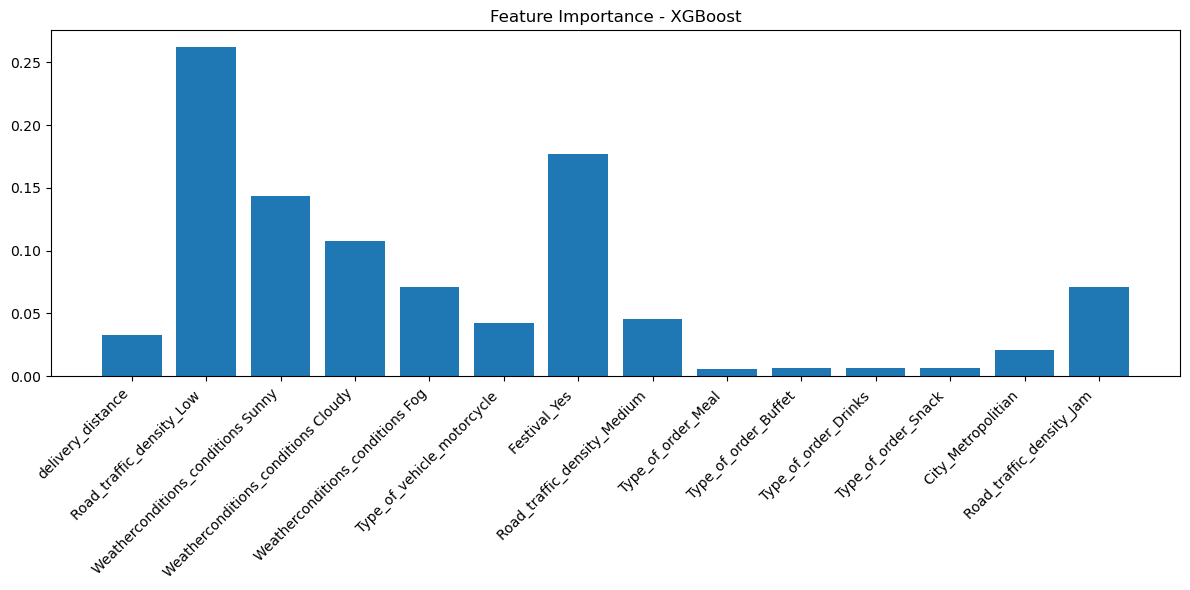


Total execution time: 3.22 seconds

5. Example Prediction:
Predicted delivery time: 46.71 minutes
Actual delivery time: 42.00 minutes

Feature Importance:
delivery_distance: 0.0329
Road_traffic_density_Low : 0.2624
Weatherconditions_conditions Sunny: 0.1434
Weatherconditions_conditions Cloudy: 0.1078
Weatherconditions_conditions Fog: 0.0710
Type_of_vehicle_motorcycle : 0.0420
Festival_Yes : 0.1772
Road_traffic_density_Medium : 0.0459
Type_of_order_Meal : 0.0060
Type_of_order_Buffet : 0.0066
Type_of_order_Drinks : 0.0061
Type_of_order_Snack : 0.0067
City_Metropolitian : 0.0208
Road_traffic_density_Jam : 0.0712


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
from time import time

# Start timing
start_time = time()

print("1. Loading and cleaning data...")
# Assuming df_encoded is your preprocessed dataframe
X = df_encoded.drop('Time_taken(min)', axis=1)
y = df_encoded['Time_taken(min)']

# Store original feature names
all_features = X.columns.tolist()

# Remove outliers using IQR method
def remove_outliers(df, target):
    Q1 = target.quantile(0.25)
    Q3 = target.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (target >= lower_bound) & (target <= upper_bound)
    return df[outlier_mask], target[outlier_mask]

# Remove outliers
X_cleaned, y_cleaned = remove_outliers(X, y)
print(f"Rows after outlier removal: {len(X_cleaned)} (removed {len(X) - len(X_cleaned)} outliers)")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Scale the features using RobustScaler (less sensitive to outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to dataframes with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_features)

print("\n2. Training initial model for feature selection...")
# Train initial random forest for feature importance
initial_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
initial_model.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': initial_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Select top features (adjust threshold as needed)
top_features = feature_importance[feature_importance['importance'] > 0.01]['feature'].tolist()
print(f"\nSelected {len(top_features)} important features")

# Create dataset with selected features
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]

print("\n3. Training models with selected features...")
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=200,
        max_depth=7,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'R2': r2,
        'Features': top_features,
        'Model': model
    }
    print(f"{name} R² Score: {r2:.4f}")

# Get best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = results[best_model_name]['Model']
best_r2 = results[best_model_name]['R2']

print(f"\n4. Best Model: {best_model_name}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot feature importance for best model
plt.figure(figsize=(12, 6))
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    plt.bar(top_features, importance)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

# Create prediction function
def predict_delivery_time(new_data):
    # Ensure all original features are present
    missing_cols = set(top_features) - set(new_data.columns)
    for col in missing_cols:
        new_data[col] = 0
    
    # Select only the needed features in the correct order
    new_data = new_data[top_features]
    
    # Make prediction
    return best_model.predict(new_data)

print(f"\nTotal execution time: {time() - start_time:.2f} seconds")

# Example prediction
print("\n5. Example Prediction:")
sample_data = X_test_scaled[top_features].iloc[0:1]
prediction = predict_delivery_time(sample_data)
print(f"Predicted delivery time: {prediction[0]:.2f} minutes")
print(f"Actual delivery time: {y_test.iloc[0]:.2f} minutes")

# Print feature importance
print("\nFeature Importance:")
for feat, imp in zip(top_features, best_model.feature_importances_):
    print(f"{feat}: {imp:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, SelectFromModel
from itertools import combinations
from time import time
import pickle  # for saving progress

# Start timing
start_time = time()

# Check if we have saved progress
try:
    with open('model_progress.pkl', 'rb') as f:
        saved_state = pickle.load(f)
        X_train_scaled = saved_state['X_train_scaled']
        X_test_scaled = saved_state['X_test_scaled']
        y_train = saved_state['y_train']
        y_test = saved_state['y_test']
        all_selected_features = saved_state['all_selected_features']
        best_r2 = saved_state['best_r2']
        best_model = saved_state['best_model']
        best_features = saved_state['best_features']
        last_n_features = saved_state['last_n_features']
        scaler = saved_state['scaler']
        print("Loaded saved progress!")
except FileNotFoundError:
    print("Starting from beginning...")
    # Your existing data loading and preprocessing code here
    best_r2 = 0
    best_model = None
    best_features = None
    last_n_features = 5  # Start with 5 features

    # Save progress after preprocessing
    saved_state = {
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'all_selected_features': all_selected_features,
        'best_r2': best_r2,
        'best_model': best_model,
        'best_features': best_features,
        'last_n_features': last_n_features,
        'scaler': scaler
    }
    with open('model_progress.pkl', 'wb') as f:
        pickle.dump(saved_state, f)

# Continue with model training from where we left off
for n_features in range(last_n_features, len(all_selected_features) + 1, 5):
    print(f"\nTrying combinations of {n_features} features...")
    
    for feature_combo in combinations(all_selected_features, min(n_features, len(all_selected_features))):
        # Your existing training code here
        
        # Save progress after each successful combination
        saved_state['best_r2'] = best_r2
        saved_state['best_model'] = best_model
        saved_state['best_features'] = best_features
        saved_state['last_n_features'] = n_features
        with open('model_progress.pkl', 'wb') as f:
            pickle.dump(saved_state, f)

# Rest of your code...

print("1. Loading and cleaning data...")
X = df_encoded.drop('Time_taken(min)', axis=1)
y = df_encoded['Time_taken(min)']

# Remove outliers using IQR method
def remove_outliers(df, target):
    Q1 = target.quantile(0.25)
    Q3 = target.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (target >= lower_bound) & (target <= upper_bound)
    return df[outlier_mask], target[outlier_mask]

X_cleaned, y_cleaned = remove_outliers(X, y)
print(f"Rows after outlier removal: {len(X_cleaned)} (removed {len(X) - len(X_cleaned)} outliers)")

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("\n2. Feature Selection...")
# Multiple feature selection methods
selection_methods = {
    'RFE': RFE(estimator=RandomForestRegressor(n_jobs=-1), n_features_to_select=10),
    'SelectFromModel': SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1)),
    'ExtraTrees': SelectFromModel(estimator=ExtraTreesRegressor(n_jobs=-1))
}

selected_features = {}
for name, selector in selection_methods.items():
    selector.fit(X_train_scaled, y_train)
    if hasattr(selector, 'get_support'):
        selected_features[name] = X_train_scaled.columns[selector.get_support()].tolist()
    else:
        selected_features[name] = X_train_scaled.columns[selector.get_feature_names_out()].tolist()

# Combine selected features
all_selected_features = list(set([f for features in selected_features.values() for f in features]))
print(f"Selected {len(all_selected_features)} features")

print("\n3. Training multiple models with hyperparameter tuning...")
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 15, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'LightGBM': {
        'model': LGBMRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'CatBoost': {
        'model': CatBoostRegressor(random_state=42, verbose=False),
        'params': {
            'iterations': [100, 200, 300],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'Neural Network': {
        'model': MLPRegressor(random_state=42, max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001, 0.01]
        }
    }
}

results = {}
best_r2 = 0
best_model = None
best_features = None

# Try different feature combinations and models
for n_features in range(5, len(all_selected_features) + 1, 5):
    print(f"\nTrying combinations of {n_features} features...")
    
    for feature_combo in combinations(all_selected_features, min(n_features, len(all_selected_features))):
        X_train_subset = X_train_scaled[list(feature_combo)]
        X_test_subset = X_test_scaled[list(feature_combo)]
        
        for name, model_info in models.items():
            print(f"Training {name}...")
            grid_search = GridSearchCV(
                model_info['model'],
                model_info['params'],
                cv=5,
                scoring='r2',
                n_jobs=-1
            )
            
            grid_search.fit(X_train_subset, y_train)
            y_pred = grid_search.predict(X_test_subset)
            r2 = r2_score(y_test, y_pred)
            
            if r2 > best_r2:
                best_r2 = r2
                best_model = grid_search.best_estimator_
                best_features = list(feature_combo)
                print(f"\nNew best R² found: {best_r2:.4f}")
                print(f"Model: {name}")
                print(f"Features: {best_features}")
                
            if r2 >= 0.80:
                print(f"\nReached target R² of 0.80!")
                break
        
        if best_r2 >= 0.80:
            break
    
    if best_r2 >= 0.80:
        break

print("\n4. Final Results:")
print(f"Best R² Score: {best_r2:.4f}")
print("Best Features:", best_features)

# Create prediction function
def predict_delivery_time(new_data):
    new_data = new_data[best_features]
    new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=new_data.columns)
    return best_model.predict(new_data_scaled)

print(f"\nTotal execution time: {time() - start_time:.2f} seconds")

# Example prediction
print("\n5. Example Prediction:")
sample_data = X_test[best_features].iloc[0:1]
prediction = predict_delivery_time(sample_data)
print(f"Predicted delivery time: {prediction[0]:.2f} minutes")
print(f"Actual delivery time: {y_test.iloc[0]:.2f} minutes")

Loaded saved progress!

Trying combinations of 10 features...
1. Loading and cleaning data...
Rows after outlier removal: 45323 (removed 270 outliers)

2. Feature Selection...
Selected 10 features

3. Training multiple models with hyperparameter tuning...

Trying combinations of 5 features...
Training Random Forest...


/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



New best R² found: 0.2696
Model: Random Forest
Features: ['Weatherconditions_conditions Fog', 'Type_of_vehicle_motorcycle ', 'Weatherconditions_conditions Cloudy', 'delivery_distance', 'Type_of_order_Buffet ']
Training XGBoost...

New best R² found: 0.2762
Model: XGBoost
Features: ['Weatherconditions_conditions Fog', 'Type_of_vehicle_motorcycle ', 'Weatherconditions_conditions Cloudy', 'delivery_distance', 'Type_of_order_Buffet ']
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 29006, number of used features: 5
[LightGBM] [Info] Start training from score 26.113287
[LightGBM] [Warning] No further splits with positive gain,

/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/lanahuyen/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


urther splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi